In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [17]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head(10)    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [5]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['furnishingstatus']])
encoded = encoded.astype(int)
encoded_cols = encoder.get_feature_names_out(['furnishingstatus'])
encoded_df = pd.DataFrame(encoded, columns=encoded_cols)
df = pd.concat([df.drop('furnishingstatus', axis=1), encoded_df], axis=1)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1


In [6]:
X = df.drop('price', axis=1)
y = df['price']
print("Features:", X.columns.tolist())

Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (436, 13)
Test shape: (109, 13)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 970043.4039201637
Mean Squared Error (MSE): 1754318687330.6628
R² Score: 0.6529242642153186


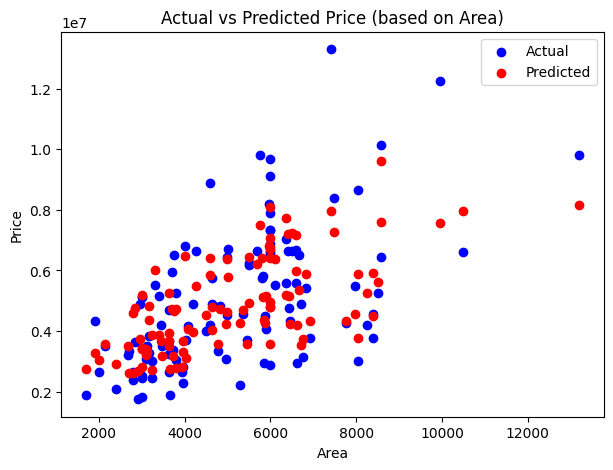

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price (based on Area)')
plt.legend()
plt.show()

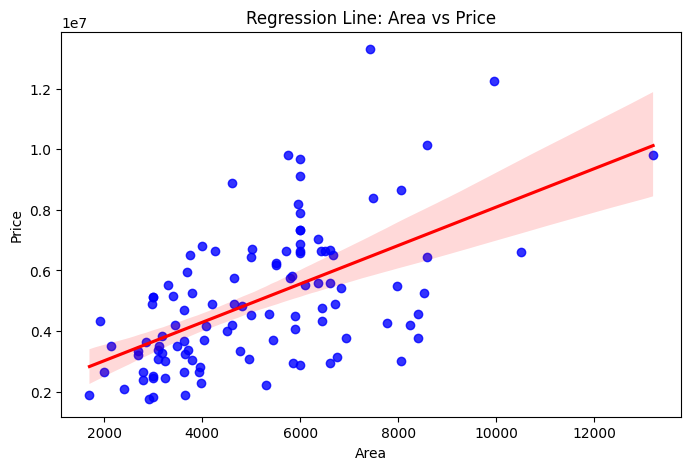

In [15]:
plt.figure(figsize=(8,5))
sns.regplot(x=X_test['area'], y=y_test, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Regression Line: Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [14]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


In [17]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
efficiency = r2 * 100
print(f"Prediction Efficiency of Model: {efficiency:.2f}%")

Prediction Efficiency of Model: 65.29%


In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
print("R² (Random Forest):", rf.score(X_test, y_test))

gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
gb.fit(X_train, y_train)
print("R² (Gradient Boosting):", gb.score(X_test, y_test))

R² (Random Forest): 0.6126679811218625
R² (Gradient Boosting): 0.6723209443913902


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

gb = GradientBoostingRegressor(random_state=42)
grid = GridSearchCV(gb, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best R²:", grid.best_score_)

Best Params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Best R²: 0.602543566448429


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def check_efficiency(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    efficiency = r2 * 100

    print("Model Efficiency Report")
    print("--------------------------------")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Prediction Efficiency: {efficiency:.2f}%")
    print("--------------------------------")

    return r2, efficiency
